# 1. 决策树实战

## 1.1 决策树分类鸢尾花数据

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

iris = datasets.load_iris() # 字典类型的数据
X = iris['data']
y = iris['target']
name = iris['target_names'] # 特征，画图时使用

# 随机拆分
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 256)

# max_depth调整树深度：剪枝操作
# max_depth默认，深度最大，延伸到将数据完全划分开为止。
model = DecisionTreeClassifier(max_depth=None,criterion='entropy')
model.fit(X_train,y_train)

y_ = model.predict(X_test) # 将数据X_test放到，决策树中，特征条件，沿着某个分支，走走走，到叶节点
# 叶节点，是什么类别，这个数据，就判定为什么类别！！！

print('真实类别是：',y_test)
print('算法预测是：',y_)
print('准确率是：',model.score(X_test,y_test))

真实类别是： [0 2 1 0 2 1 0 1 1 1 2 2 2 0 0 1 2 1 0 2 1 0 1 1 2 0 0 1 0 0 2 0 2 2 1 2 0
 0]
算法预测是： [0 2 1 0 2 1 0 1 1 1 2 2 2 0 0 1 2 1 0 2 1 0 1 1 2 0 0 1 0 0 2 0 1 2 1 2 0
 0]
准确率是： 0.9736842105263158


In [3]:
# 决策树提供了predict_proba这个方法，发现这个方法，返回值要么是0，要么是1
model.predict_proba(X_test)[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

- 决策树，叶节点，数据根据条件判断，沿着树“走”到某个叶节点，特定叶节点的类别是固定的，走到这个类别，数据类别就100%确定了
- logistic regression使用sigmoid函数计算概率

## 1.2 决策树可视化

In [ ]:
# iris 查看字典结构

In [5]:
import graphviz
from sklearn import tree
# 导出数据
dot_data = tree.export_graphviz(model,feature_names= iris['feature_names'],
                     class_names= name,# 类别名 name = iris['target_names']
                     filled=True, # 填充颜色
                     rounded=True,)
graph = graphviz.Source(dot_data)
graph.render('iris',format='png')
# graph

'iris.png'

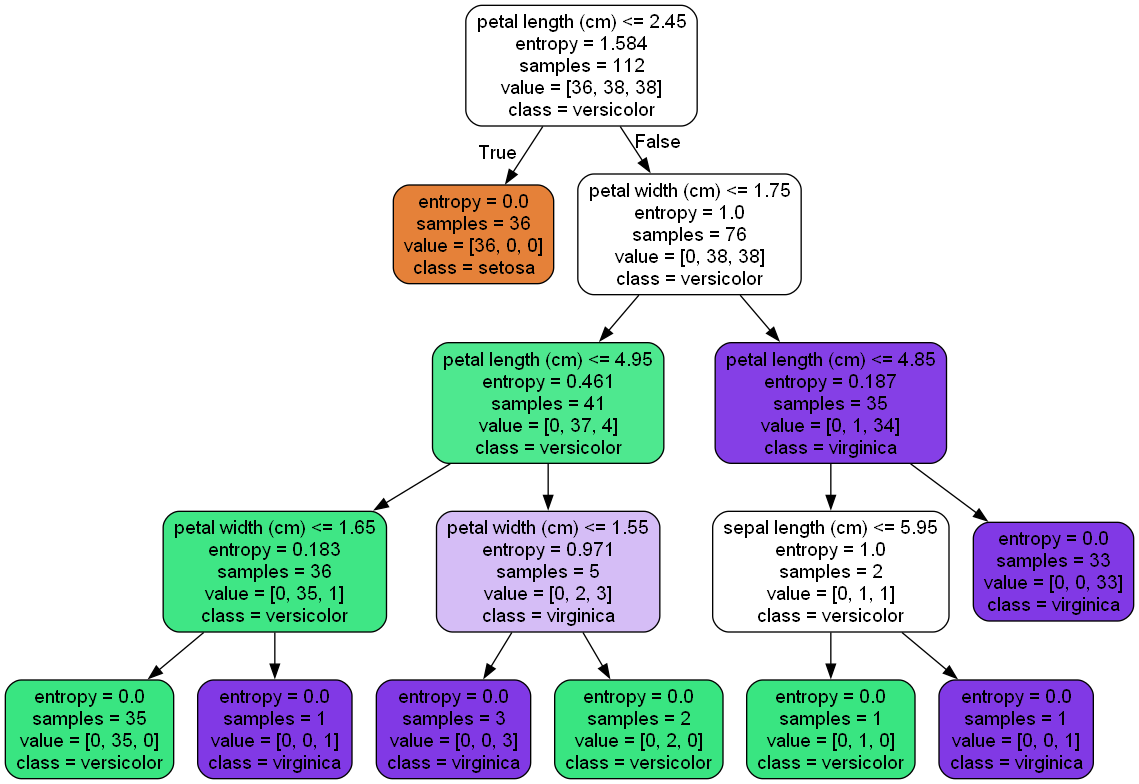

In [ ]:
# max_depth=None 所以一直到完全分开，最后 entropy=0

## 1.3 决策树的剪枝

### 1.3.1 max_depth

In [5]:
# max_depth调整树深度：剪枝操作
for i in range(1,4):
    model = DecisionTreeClassifier(max_depth= i,criterion='entropy')
    model.fit(X_train,y_train)
    print(f'max_depth= {i} 准确率是：{model.score(X_test, y_test)}')
    # print('max_depth= {} 准确率是：{}'.format(i, model.score(X_test, y_test)))
    # print('max_depth= %d 准确率是：%.4f' % (i, model.score(X_test,y_test)))

max_depth= 1 准确率是：0.6842105263157895
max_depth= 2 准确率是：0.9736842105263158
max_depth= 3 准确率是：0.9736842105263158


In [6]:
import graphviz
from sklearn import tree
                                 # model里用的是上面for循环里max_depth=3
dot_data = tree.export_graphviz(model, feature_names= iris['feature_names'],
                     class_names= name,# 类别名 name = iris['target_names']
                     filled=True, # 填充颜色
                     rounded=True,)
graph = graphviz.Source(dot_data)
# graph
graph.render('iris2',format='png')

'iris2.png'

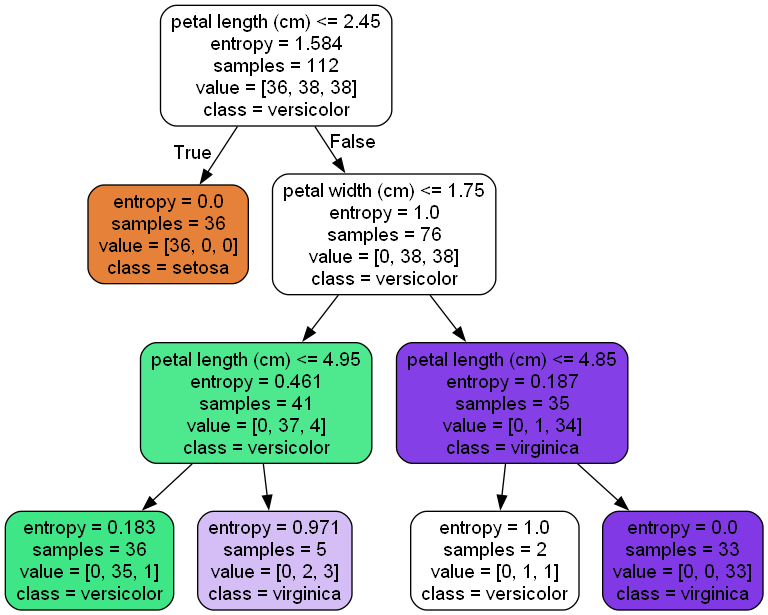

### 1.3.2 min_impurity_decrease（节点划分最小不纯度）

In [4]:
# min_impurity_decrease（节点划分最小不纯度）：剪枝操作
# 如果节点的不纯度（gini系数、信息熵）小于这个阈值，不分裂
# 鸡肋，一点点肉，不值当，gini变化小，放弃
model = DecisionTreeClassifier(min_impurity_decrease = 0.2,criterion='entropy')
model.fit(X_train,y_train)
print('准确率是：',model.score(X_test,y_test))
dot_data = tree.export_graphviz(model,feature_names= iris['feature_names'],
                     class_names= name,# 类别名
                     filled=True, # 填充颜色
                     rounded=True,)
graph = graphviz.Source(dot_data)
# graph
graph.render('iris3',format='png')

准确率是： 0.9736842105263158


'iris3.png'

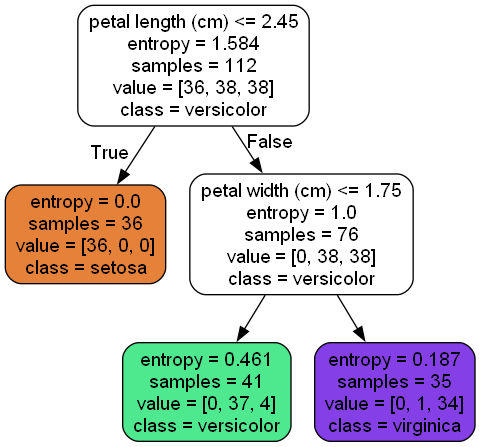

### 1.3.3 min_samples_leaf 叶子节点最少样本树

In [7]:
# min_samples_leaf 叶子节点最少样本树
model = DecisionTreeClassifier(min_samples_leaf=40,criterion='entropy')
model.fit(X_train,y_train)
print('准确率是：',model.score(X_test,y_test))
dot_data = tree.export_graphviz(model,feature_names= iris['feature_names'],
                     class_names= name,# 类别名
                     filled=True, # 填充颜色
                     rounded=True,)
graph = graphviz.Source(dot_data)
# graph
graph.render('iris4',format='png')

准确率是： 0.6842105263157895


'iris4.png'

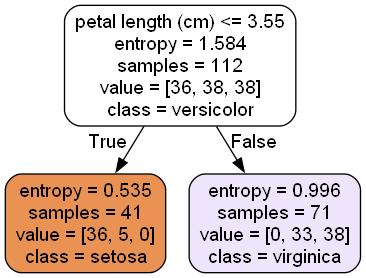

## 1.4 选择合适超参数【max_depth为例】

决策树深度是1，错误率为31.579%
决策树深度是2，错误率为2.632%
决策树深度是3，错误率为2.632%
决策树深度是4，错误率为2.632%
决策树深度是5，错误率为2.632%
决策树深度是6，错误率为2.632%
决策树深度是7，错误率为2.632%
决策树深度是8，错误率为2.632%
决策树深度是9，错误率为2.632%
决策树深度是10，错误率为2.632%
决策树深度是11，错误率为2.632%
决策树深度是12，错误率为2.632%
决策树深度是13，错误率为2.632%
决策树深度是14，错误率为2.632%
决策树深度是15，错误率为2.632%


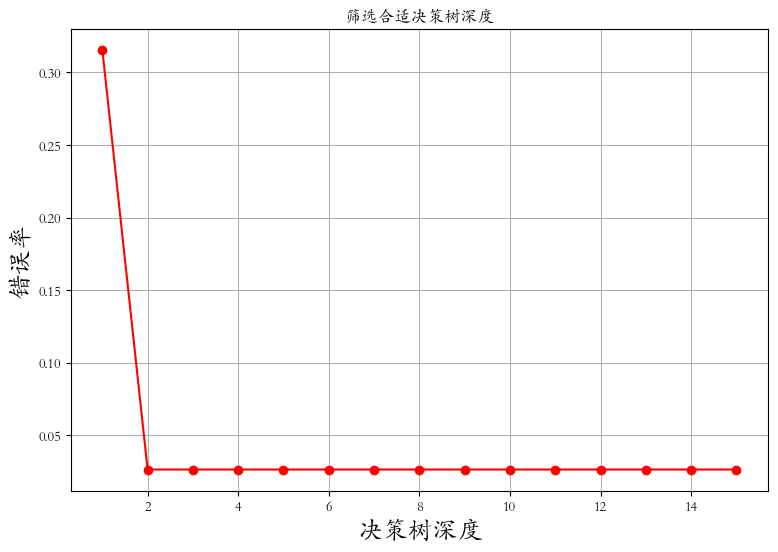

In [9]:
depth = np.arange(1,16)
err = [] # 列表，error误差，可以使用准确率表示accurate；err = 1 - accurate
for d in depth:
    model = DecisionTreeClassifier(criterion='entropy',max_depth=d)
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    err.append(1 - score)
    print('决策树深度是%d，错误率为%0.3f%%' % (d ,100 * (1 - score)))

# 画图    
plt.figure(figsize=(9,6))
plt.rcParams['font.family'] = 'STKaiti'
plt.plot(depth,err,'ro-')
plt.xlabel('决策树深度',fontsize = 18)
plt.ylabel('错误率',fontsize = 18)
plt.title('筛选合适决策树深度')
plt.grid()

决策树深度是1，准确率为68.421%
决策树深度是2，准确率为97.368%
决策树深度是3，准确率为97.368%
决策树深度是4，准确率为97.368%
决策树深度是5，准确率为97.368%
决策树深度是6，准确率为97.368%
决策树深度是7，准确率为97.368%
决策树深度是8，准确率为97.368%
决策树深度是9，准确率为97.368%
决策树深度是10，准确率为97.368%
决策树深度是11，准确率为97.368%
决策树深度是12，准确率为97.368%
决策树深度是13，准确率为97.368%
决策树深度是14，准确率为97.368%
决策树深度是15，准确率为97.368%


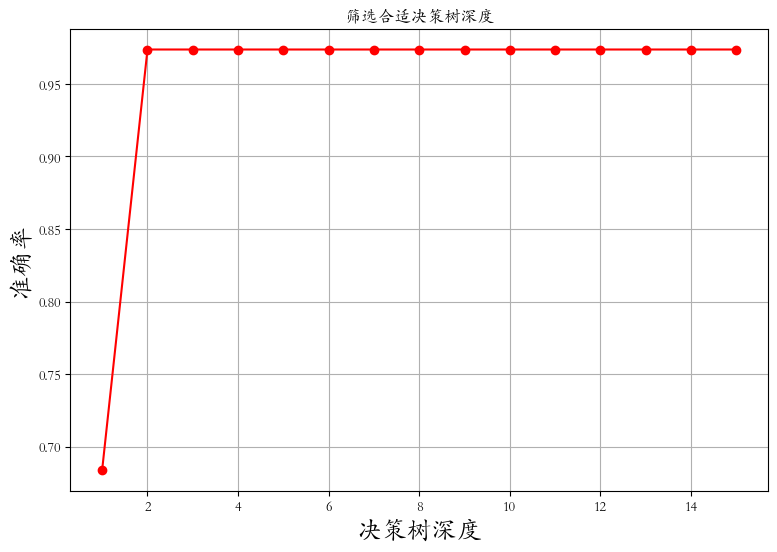

In [10]:
depth = np.arange(1,16)
acc = []
for d in depth:
    model = DecisionTreeClassifier(criterion='entropy',max_depth=d)
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    acc.append(score)
    print('决策树深度是%d，准确率为%0.3f%%' % (d ,100 * score))
# 画图    
plt.figure(figsize=(9,6))
plt.rcParams['font.family'] = 'STKaiti'
plt.plot(depth,acc,'ro-')
plt.xlabel('决策树深度',fontsize = 18)
plt.ylabel('准确率',fontsize = 18)
plt.title('筛选合适决策树深度')
plt.grid()

## 1.5 不同属性的重要性

In [11]:
# 决策树，进行构建时，信息熵、gini系数构建
# 获取，不同属性的重要性【不同】
# 如果是0，删除，也不会有影响
model.feature_importances_

array([0.01126989, 0.        , 0.6394416 , 0.3492885 ])

- LR，SVC，决策树中，只有决策树有feature_importances_
- LR返回的系数，不能表示特征重要与否
- 线性回归，系数绝对值大小可以表示特征重要性